### Load data

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
with open('/preprocessing/processed_data.pickle','rb') as f:
    preproc_data = pickle.load(f)

In [3]:
cytokine_df = preproc_data['cytokine_data']
patient_meta = preproc_data['metadata'] 
patient_info = preproc_data['clinical'] 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import MinMaxScaler


### Plot NLR, LDH and annotate sample

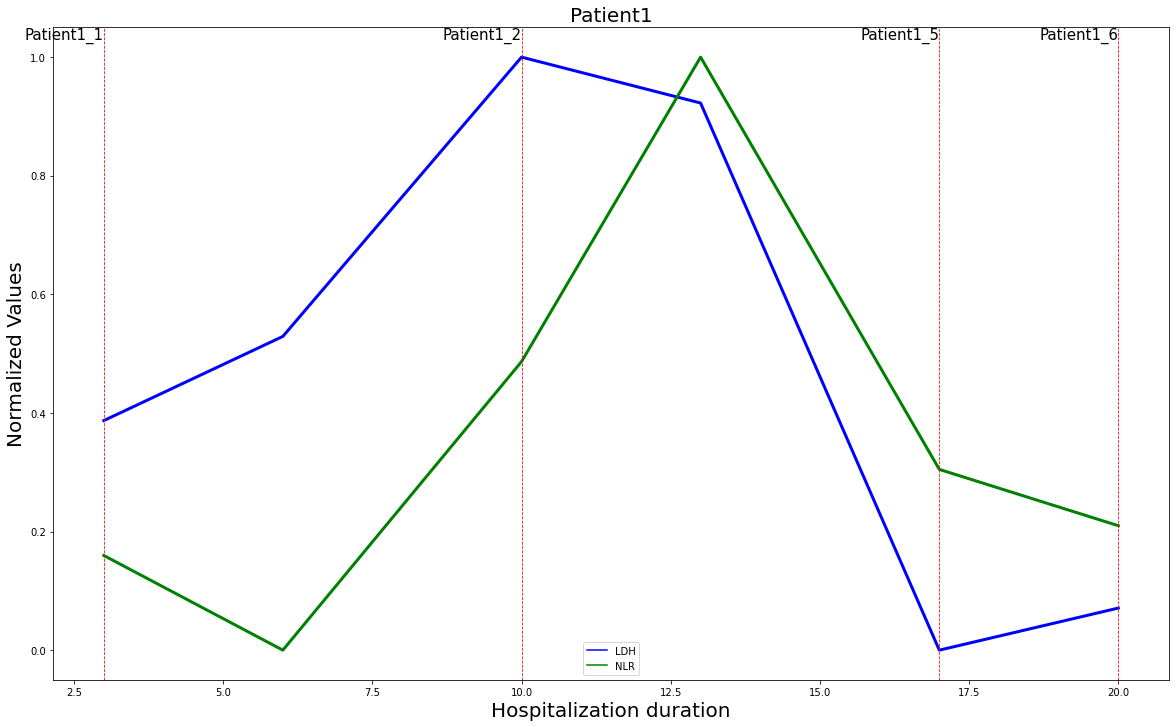

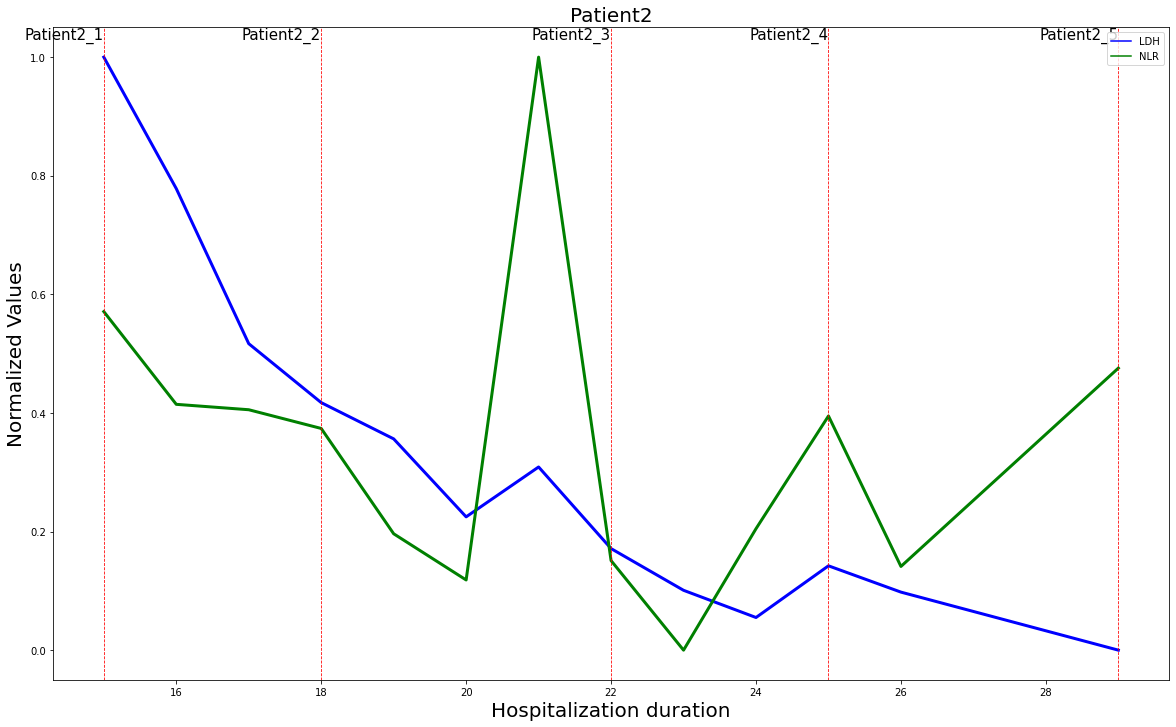

In [6]:
for i in patient_info:
    df = patient_info[i].copy()
    df.index = df.time_gaps
    df_plot = df.loc[:,['LDH','NLR']]
    df_scaled = df_plot.copy()

    for column in ['NLR', 'LDH']:
        # Selecting the column, dropping NaNs for fitting, then transforming the entire column to retain NaN positions
        non_nan_values = df[[column]].dropna()
        scaler = MinMaxScaler()
        scaler.fit(non_nan_values)
        df_scaled[column] = scaler.transform(df[[column]])
    # Plotting the normalized values again
    plt.figure(figsize=(20, 12))
    sns.lineplot(data=df_scaled, dashes=False, palette={'NLR': 'green', 'LDH': 'blue'}, linewidth=3)
    for j, sample in zip(df.index,df.cytokine_exist):
        if sample is not None and sample in cytokine_df.index:
            plt.axvline(x=j, color='r', linestyle='--', linewidth=0.8)
            plt.text(j, 1.05, sample, rotation=0, verticalalignment='top', horizontalalignment='right', fontsize=15, color='black')

    plt.xlabel("Hospitalization duration", fontsize = 20)
    plt.ylabel("Normalized Values", fontsize = 20)
    plt.title(i, fontsize = 20)
    plt.legend()

    plt.show()

### PPG labeling

For PPG labeling, we did manual procedure.
For example, in Patient_1, we can say interval from third day to 13th day as DP and the other interval would be RP
In Patient_2, it's hard to determine that all interval is RP because there is some disagreeable datapoints which look like outlier in LDH.
In that case, we would label them as RP even though they are not perfact matching case.

In [7]:
patient_meta

,Sample,Patient,Severity,Max_Severity
0,Patient1_1,Patient1,4.0,Max_M
1,Patient1_2,Patient1,4.0,Max_M
2,Patient1_5,Patient1,5.0,Max_M
3,Patient1_6,Patient1,4.0,Max_M
4,Patient2_1,Patient2,8.0,Max_S
5,Patient2_2,Patient2,8.0,Max_S
6,Patient2_3,Patient2,7.0,Max_S
7,Patient2_4,Patient2,7.0,Max_S
8,Patient2_5,Patient2,4.0,Max_S


In [8]:
patient_meta['PPG'] = ['DP','DP','RP','RP','RP','RP','RP','RP','RP']
patient_meta    

,Sample,Patient,Severity,Max_Severity,PPG
0,Patient1_1,Patient1,4.0,Max_M,DP
1,Patient1_2,Patient1,4.0,Max_M,DP
2,Patient1_5,Patient1,5.0,Max_M,RP
3,Patient1_6,Patient1,4.0,Max_M,RP
4,Patient2_1,Patient2,8.0,Max_S,RP
5,Patient2_2,Patient2,8.0,Max_S,RP
6,Patient2_3,Patient2,7.0,Max_S,RP
7,Patient2_4,Patient2,7.0,Max_S,RP
8,Patient2_5,Patient2,4.0,Max_S,RP


In [9]:
detailed_ppg = []
for i,j in zip(patient_meta.Max_Severity,patient_meta.PPG):
    if i =='Max_M':
        detailed_ppg.append('m'+j)
    else:
        detailed_ppg.append('s'+j)

In [10]:
patient_meta['Detailed_PPG'] = detailed_ppg
patient_meta

,Sample,Patient,Severity,Max_Severity,PPG,Detailed_PPG
0,Patient1_1,Patient1,4.0,Max_M,DP,mDP
1,Patient1_2,Patient1,4.0,Max_M,DP,mDP
2,Patient1_5,Patient1,5.0,Max_M,RP,mRP
3,Patient1_6,Patient1,4.0,Max_M,RP,mRP
4,Patient2_1,Patient2,8.0,Max_S,RP,sRP
5,Patient2_2,Patient2,8.0,Max_S,RP,sRP
6,Patient2_3,Patient2,7.0,Max_S,RP,sRP
7,Patient2_4,Patient2,7.0,Max_S,RP,sRP
8,Patient2_5,Patient2,4.0,Max_S,RP,sRP


In [11]:
#update dataset
preproc_data['metadata'] = patient_meta  


### Save data

In [12]:
with open('/preprocessing/processed_data.pickle','wb') as f:
    pickle.dump(preproc_data,f)